In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("C:/Users/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()
df.describe()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


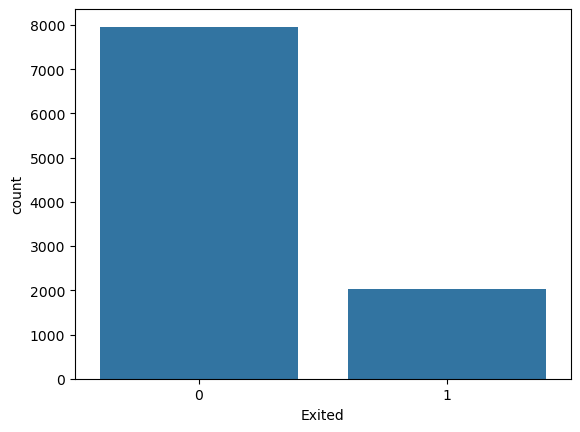

In [6]:
sns.countplot(x="Exited", data=df)
plt.show()

In [7]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Encodage des variables catégorielles
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

# Variables explicatives et cible
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [8]:
X = df.drop("Exited", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("n\Rapport de classification :\n", classification_report(y_test, y_pred))

Accuracy: 0.811

Matrice de confusion :
 [[1543   64]
 [ 314   79]]
n\Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [11]:
# 3️⃣ Appliquer SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

model.fit(X_res,  y_res)
y_pred_res = model.predict(X_test)

In [12]:
print("predict :", y_pred_res)

predict : [1 0 1 ... 1 0 0]


In [14]:
y_prob = model.predict_proba(X_test)[:, 1]

In [15]:
print("predict:", y_prob)

predict: [0.54752333 0.06039046 0.72307186 ... 0.67564746 0.15741324 0.28563398]


In [17]:
df_results = pd.DataFrame(X_test, columns=df.columns)

df_results["Actual"] = y_test
df_results["Predicted"] = y_pred_res
df_results["Churn_prob"] = y_prob

In [20]:
print(df_results.head(10))

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
6252          596       1   32       3   96709.07              2          0   
4684          623       1   43       1       0.00              2          1   
1731          601       0   44       4       0.00              2          1   
4742          506       1   59       8  119152.10              2          1   
4521          560       0   27       7  124995.98              1          1   
6340          790       1   37       8       0.00              2          1   
576           439       0   32       3  138901.61              1          1   
5202          597       0   22       6  101528.61              1          1   
6363          678       0   40       4  113794.22              1          1   
439           464       0   42       3   85679.25              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
6252               0         41788.37     NaN               Tr

In [21]:
df_results.to_csv("Churn_Predictions_with_proba.csv", index=False)
print("Saved succesfully!")

Saved succesfully!
